### Import Libraries

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt


### Set Parameters and Create Directories

In [5]:
# Params
DATA_DIR_PATH = './Data/wav1/'
OUTPUT_DIR_PATH_MEL = './Data/processed/mel/'
OUTPUT_DIR_PATH_STFT = './Data/processed/stft/'

# Create Directories if they don't exist

for path in [OUTPUT_DIR_PATH_MEL, OUTPUT_DIR_PATH_STFT]:
    if not os.path.exists(path):
        os.makedirs(path)

for dir in os.listdir(DATA_DIR_PATH):
    if not os.path.exists(OUTPUT_DIR_PATH_MEL + dir):
        os.makedirs(OUTPUT_DIR_PATH_MEL + dir)
    if not os.path.exists(OUTPUT_DIR_PATH_STFT + dir):
        os.makedirs(OUTPUT_DIR_PATH_STFT + dir)

def divide_into_folders(folder, n):
    path_to_folder = DATA_DIR_PATH + folder

    for i in range(n):
        if not os.path.exists(DATA_DIR_PATH + folder + str(i)):
            os.makedirs(DATA_DIR_PATH + folder + str(i))

    counter=0
    i=0
    for file in os.listdir(path_to_folder):
        if i%100 == 0:
            counter += 1
        path = DATA_DIR_PATH + folder + str(counter) + '/'
        if file.endswith('.wav'):
            # relocate the file
            os.rename(path_to_folder + file, path + file)
        i += 1

In [20]:
# divide_into_folders("Instrumental/", 57)
# divide_into_folders("International/", 52)
# divide_into_folders("Pop/", 95)
# divide_into_folders("Old-Time/", 43)

### Helper functions to convert files from .wav to an STFT and Mel-Spectrogram .png images

In [15]:
def wav_to_stft(input_file_path: str, output_file_path: str, n_fft: int = 2048, hop_length: int = 512) -> None:
    """
    Function to convert a .wav file to an STFT .png image
    """
    audio, sample_rate = librosa.load(input_file_path, sr=None)
    stft = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

    librosa.display.specshow(
        librosa.amplitude_to_db(stft, ref=np.max),
        sr=sample_rate,
        n_fft=n_fft,
        hop_length=hop_length,
        x_axis='time',
        y_axis='log',
        cmap='viridis'
    )
    plt.axis('off')
    plt.xlim([0, int(len(audio)/sample_rate)])
    plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def wav_to_mel_spectrogram(input_file_path: str, output_file_path: str, n_fft: int = 2048, hop_length: int = 512, n_mels: int = 128) -> None:
    """
    Function to convert a .wav file to a mel spectrogram .png image
    """
    audio, sample_rate = librosa.load(input_file_path)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

    librosa.display.specshow(
        librosa.power_to_db(mel_spectrogram, ref=np.max),
        sr=sample_rate,
        x_axis='time',
        y_axis='mel',
        cmap='viridis'
    )
    plt.axis('off')
    plt.xlim([0, int(len(audio)/sample_rate)])
    plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0)
    plt.close()

### Some examples

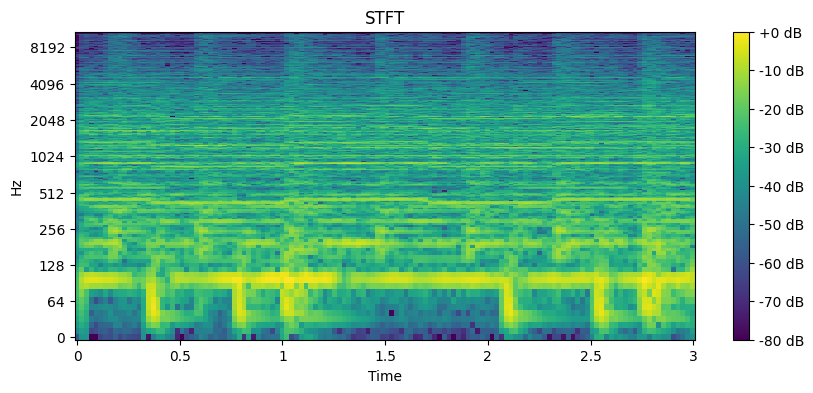

In [4]:
# example wav -> stft

audio_file = './Data/wav1/Jazz/237.0.wav'

y, sr = librosa.load(audio_file)

n_fft = 2048 
hop_length = 512
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(abs(D), ref=np.max), sr=sr, n_fft =n_fft, hop_length=hop_length, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()
# plt.savefig('stft.png', bbox_inches='tight', pad_inches=0.0)
plt.close()

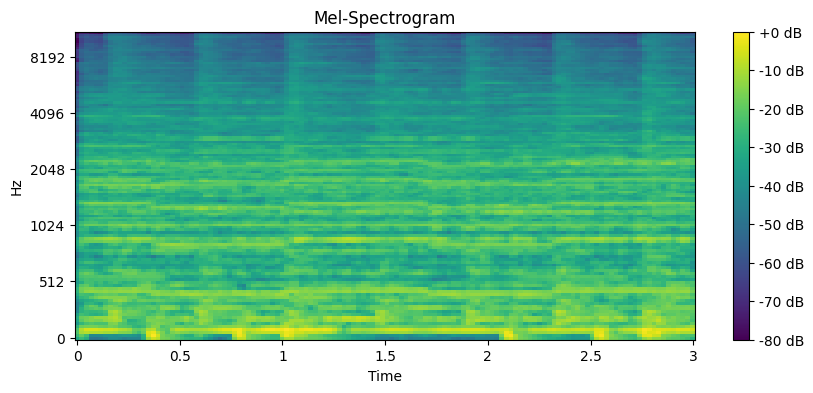

In [5]:
# example wav -> mel

audio_file = './Data/wav1/Jazz/237.0.wav'

y, sr = librosa.load(audio_file)

mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()
# plt.savefig('mel_spectrogram.png', bbox_inches='tight', pad_inches=0.0)  # Zapisanie jako plik PNG
plt.close()

### Convert each directory one by one

#### Instrumental

In [41]:
# dir = "Instrumental"
# for file in os.listdir(DATA_DIR_PATH + dir):
#     input_file_path = DATA_DIR_PATH + dir + '/' + file
    
#     output_file_path_stft = OUTPUT_DIR_PATH_STFT + dir + '/' + file.replace('.wav', '.png')
#     output_file_path_mel = OUTPUT_DIR_PATH_MEL + dir + '/' + file.replace('.wav', '.png')

#     wav_to_stft(input_file_path, output_file_path_stft)
#     wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [25]:
name = 'Instrumental'
path = DATA_DIR_PATH + 'Instrumental/'
for dir in range(0,10):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [26]:
name = 'Instrumental'
path = DATA_DIR_PATH + 'Instrumental/'
for dir in range(10,20):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [27]:
name = 'Instrumental'
path = DATA_DIR_PATH + 'Instrumental/'
for dir in range(20,30):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [28]:
name = 'Instrumental'
path = DATA_DIR_PATH + 'Instrumental/'
for dir in range(30,40):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [29]:
name = 'Instrumental'
path = DATA_DIR_PATH + 'Instrumental/'
for dir in range(40,57):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

#### International

In [30]:
# dir = "International"
# for file in os.listdir(DATA_DIR_PATH + dir):
#     input_file_path = DATA_DIR_PATH + dir + '/' + file
    
#     output_file_path_stft = OUTPUT_DIR_PATH_STFT + dir + '/' + file.replace('.wav', '.png')
#     output_file_path_mel = OUTPUT_DIR_PATH_MEL + dir + '/' + file.replace('.wav', '.png')

#     wav_to_stft(input_file_path, output_file_path_stft)
#     wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [31]:
name = 'International'
path = DATA_DIR_PATH + 'International/'
for dir in range(1,10):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [32]:
name = 'International'
path = DATA_DIR_PATH + 'International/'
for dir in range(10,20):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [33]:
name = 'International'
path = DATA_DIR_PATH + 'International/'
for dir in range(20,30):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [34]:
name = 'International'
path = DATA_DIR_PATH + 'International/'
for dir in range(30,40):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [35]:
name = 'International'
path = DATA_DIR_PATH + 'International/'
for dir in range(40,51):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

#### Jazz

In [36]:
# dir = "Jazz"
# for file in os.listdir(DATA_DIR_PATH + dir):
#     input_file_path = DATA_DIR_PATH + dir + '/' + file
    
#     output_file_path_stft = OUTPUT_DIR_PATH_STFT + dir + '/' + file.replace('.wav', '.png')
#     output_file_path_mel = OUTPUT_DIR_PATH_MEL + dir + '/' + file.replace('.wav', '.png')

#     wav_to_stft(input_file_path, output_file_path_stft)
#     wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

#### Old-Time

In [37]:
# dir = "Old-Time"
# for file in os.listdir(DATA_DIR_PATH + dir):
#     input_file_path = DATA_DIR_PATH + dir + '/' + file
    
#     output_file_path_stft = OUTPUT_DIR_PATH_STFT + dir + '/' + file.replace('.wav', '.png')
#     output_file_path_mel = OUTPUT_DIR_PATH_MEL + dir + '/' + file.replace('.wav', '.png')

#     wav_to_stft(input_file_path, output_file_path_stft)
#     wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [38]:
name = 'Old-Time'
path = DATA_DIR_PATH + 'Old-Time/'
for dir in range(0,10):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [39]:
name = 'Old-Time'
path = DATA_DIR_PATH + 'Old-Time/'
for dir in range(10,20):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [40]:
name = 'Old-Time'
path = DATA_DIR_PATH + 'Old-Time/'
for dir in range(20,30):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [41]:
name = 'Old-Time'
path = DATA_DIR_PATH + 'Old-Time/'
for dir in range(30,43):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

C:\Users\karol\AppData\Local\Temp\ipykernel_24228\3115717304.py:18: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim([0, int(len(audio)/sample_rate)])
C:\Users\karol\AppData\Local\Temp\ipykernel_24228\3115717304.py:37: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim([0, int(len(audio)/sample_rate)])
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


#### Pop

In [42]:
# dir = "Pop"
# for file in os.listdir(DATA_DIR_PATH + dir):
#     input_file_path = DATA_DIR_PATH + dir + '/' + file
    
#     output_file_path_stft = OUTPUT_DIR_PATH_STFT + dir + '/' + file.replace('.wav', '.png')
#     output_file_path_mel = OUTPUT_DIR_PATH_MEL + dir + '/' + file.replace('.wav', '.png')

#     wav_to_stft(input_file_path, output_file_path_stft)
#     wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [43]:
name = 'Pop'
path = DATA_DIR_PATH + 'Pop/'
for dir in range(0,10):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [44]:
name = 'Pop'
path = DATA_DIR_PATH + 'Pop/'
for dir in range(10,20):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [45]:
name = 'Pop'
path = DATA_DIR_PATH + 'Pop/'
for dir in range(20,30):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [46]:
name = 'Pop'
path = DATA_DIR_PATH + 'Pop/'
for dir in range(30,40):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [47]:
name = 'Pop'
path = DATA_DIR_PATH + 'Pop/'
for dir in range(40,50):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [48]:
name = 'Pop'
path = DATA_DIR_PATH + 'Pop/'
for dir in range(50,60):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [49]:
name = 'Pop'
path = DATA_DIR_PATH + 'Pop/'
for dir in range(60,70):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [50]:
name = 'Pop'
path = DATA_DIR_PATH + 'Pop/'
for dir in range(70,80):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [51]:
name = 'Pop'
path = DATA_DIR_PATH + 'Pop/'
for dir in range(80,95):
    dir = str(dir)
    for file in os.listdir(path + dir):
        input_file_path = path + dir + '/' + file
        
        output_file_path_stft = OUTPUT_DIR_PATH_STFT + name + '/' + file.replace('.wav', '.png')
        output_file_path_mel = OUTPUT_DIR_PATH_MEL + name + '/' + file.replace('.wav', '.png')

        wav_to_stft(input_file_path, output_file_path_stft)
        wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

#### Rock

In [52]:
# dir = "Rock"
# for file in os.listdir(DATA_DIR_PATH + dir):
#     input_file_path = DATA_DIR_PATH + dir + '/' + file
    
#     output_file_path_stft = OUTPUT_DIR_PATH_STFT + dir + '/' + file.replace('.wav', '.png')
#     output_file_path_mel = OUTPUT_DIR_PATH_MEL + dir + '/' + file.replace('.wav', '.png')

#     wav_to_stft(input_file_path, output_file_path_stft)
#     wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [53]:
# rock_path = DATA_DIR_PATH + 'Rock/'
# for dir in os.listdir(rock_path):
#     for file in os.listdir(rock_path + dir):
#         input_file_path = rock_path + dir + '/' + file
        
#         output_file_path_stft = OUTPUT_DIR_PATH_STFT + "Rock" + '/' + file.replace('.wav', '.png')
#         output_file_path_mel = OUTPUT_DIR_PATH_MEL + "Rock" + '/' + file.replace('.wav', '.png')

#         wav_to_stft(input_file_path, output_file_path_stft)
#         wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [54]:
# rock_path = DATA_DIR_PATH + 'Rock/'
# for dir in range(0,10):
#     dir = str(dir)
#     for file in os.listdir(rock_path + dir):
#         input_file_path = rock_path + dir + '/' + file
        
#         output_file_path_stft = OUTPUT_DIR_PATH_STFT + "Rock" + '/' + file.replace('.wav', '.png')
#         output_file_path_mel = OUTPUT_DIR_PATH_MEL + "Rock" + '/' + file.replace('.wav', '.png')

#         wav_to_stft(input_file_path, output_file_path_stft)
#         wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [55]:
# rock_path = DATA_DIR_PATH + 'Rock/'
# for dir in range(10,20):
#     dir = str(dir)
#     for file in os.listdir(rock_path + dir):
#         input_file_path = rock_path + dir + '/' + file
        
#         output_file_path_stft = OUTPUT_DIR_PATH_STFT + "Rock" + '/' + file.replace('.wav', '.png')
#         output_file_path_mel = OUTPUT_DIR_PATH_MEL + "Rock" + '/' + file.replace('.wav', '.png')

#         wav_to_stft(input_file_path, output_file_path_stft)
#         wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [56]:
# rock_path = DATA_DIR_PATH + 'Rock/'
# for dir in range(20,30):
#     dir = str(dir)
#     for file in os.listdir(rock_path + dir):
#         input_file_path = rock_path + dir + '/' + file
        
#         output_file_path_stft = OUTPUT_DIR_PATH_STFT + "Rock" + '/' + file.replace('.wav', '.png')
#         output_file_path_mel = OUTPUT_DIR_PATH_MEL + "Rock" + '/' + file.replace('.wav', '.png')

#         wav_to_stft(input_file_path, output_file_path_stft)
#         wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [57]:
# rock_path = DATA_DIR_PATH + 'Rock/'
# for dir in range(30,40):
#     dir = str(dir)
#     for file in os.listdir(rock_path + dir):
#         input_file_path = rock_path + dir + '/' + file
        
#         output_file_path_stft = OUTPUT_DIR_PATH_STFT + "Rock" + '/' + file.replace('.wav', '.png')
#         output_file_path_mel = OUTPUT_DIR_PATH_MEL + "Rock" + '/' + file.replace('.wav', '.png')

#         wav_to_stft(input_file_path, output_file_path_stft)
#         wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [58]:
# rock_path = DATA_DIR_PATH + 'Rock/'
# for dir in range(40,50):
#     dir = str(dir)
#     for file in os.listdir(rock_path + dir):
#         input_file_path = rock_path + dir + '/' + file
        
#         output_file_path_stft = OUTPUT_DIR_PATH_STFT + "Rock" + '/' + file.replace('.wav', '.png')
#         output_file_path_mel = OUTPUT_DIR_PATH_MEL + "Rock" + '/' + file.replace('.wav', '.png')

#         wav_to_stft(input_file_path, output_file_path_stft)
#         wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

In [59]:
# rock_path = DATA_DIR_PATH + 'Rock/'
# for dir in range(50,55):
#     dir = str(dir)
#     for file in os.listdir(rock_path + dir):
#         input_file_path = rock_path + dir + '/' + file
        
#         output_file_path_stft = OUTPUT_DIR_PATH_STFT + "Rock" + '/' + file.replace('.wav', '.png')
#         output_file_path_mel = OUTPUT_DIR_PATH_MEL + "Rock" + '/' + file.replace('.wav', '.png')

#         wav_to_stft(input_file_path, output_file_path_stft)
#         wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

#### Soul-RnB

In [60]:
# dir = "Soul-RnB"
# for file in os.listdir(DATA_DIR_PATH + dir):
#     input_file_path = DATA_DIR_PATH + dir + '/' + file
    
#     output_file_path_stft = OUTPUT_DIR_PATH_STFT + dir + '/' + file.replace('.wav', '.png')
#     output_file_path_mel = OUTPUT_DIR_PATH_MEL + dir + '/' + file.replace('.wav', '.png')

#     wav_to_stft(input_file_path, output_file_path_stft)
#     wav_to_mel_spectrogram(input_file_path, output_file_path_mel)

#### Spoken

In [61]:
# dir = "Spoken"
# for file in os.listdir(DATA_DIR_PATH + dir):
#     input_file_path = DATA_DIR_PATH + dir + '/' + file
    
#     output_file_path_stft = OUTPUT_DIR_PATH_STFT + dir + '/' + file.replace('.wav', '.png')
#     output_file_path_mel = OUTPUT_DIR_PATH_MEL + dir + '/' + file.replace('.wav', '.png')

#     wav_to_stft(input_file_path, output_file_path_stft)
#     wav_to_mel_spectrogram(input_file_path, output_file_path_mel)